# CO28 - Ferromagnetism
Calum Holker

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
from IPython.display import clear_output
%matplotlib inline

## Sweep Configuration
Performs a full sweep of the configuration given values of J and B

Input:

        S_init - NxN matrix of the initial configuration

        JkT, BkT - the values of J / kT and B / kT

Output:
        
        S_next - NxN matrix of the next configuration after one full sweep

In [5]:
def sweep(S_init, JkT, BkT):
    N = len(S_init)
    for i in range(N):
        for j in range(N):
            i1 = 0 if (i == N-1) else i+1
            j1 = 0 if (j == N-1) else j+1
            sum_SS = S_init[i,j]*((S_init[i1,j])+(S_init[i-1,j])+(S_init[i,j1])+(S_init[i,j-1]))
            sum_S = S_init[i,j]
            dEkT = (-JkT * 2 * sum_SS) + (BkT * sum_S)
            r = (np.e)**(dEkT)
            if r > 1:
                S_init[i,j] = S_init[i,j] * -1
            else:
                rand = random.random()
                if rand >= r:
                    S_init[i,j] = S_init[i,j] * -1
    return S_init

In [6]:
def show(array):
    img = plt.imshow(array, interpolation='nearest')
    plt.axis('off')
    return img

In [7]:
def initialise_state(N):
    S_init = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            rand = random.random()
            if rand >= 0.5:
                S_init[i,j] = 1
            else:
                S_init[i,j] = -1
    return S_init

In [22]:
print(np.sum(initialise_state(30)))

28.0


In [8]:
def show(S):
    clear_output()
    plt.imshow(S, interpolation='None')
    show_inline_matplotlib_plots()
    plt.pause(1)

In [89]:
N = 30
num_sweeps = 500
S = initialise_state(N)
JkT = 0.44
BkT = 0.01
Ms = [np.sum(S)]
total_Ms = [np.sum(S)]

for i in range(num_sweeps):
    S = sweep(S, JkT, BkT)
    Ms.append(np.sum(S))
    total_Ms.append(total_Ms[-1] + np.sum(S))

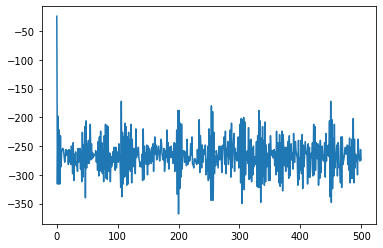

In [90]:
i = np.arange(0,num_sweeps+1,1)
plt.plot(i, Ms)

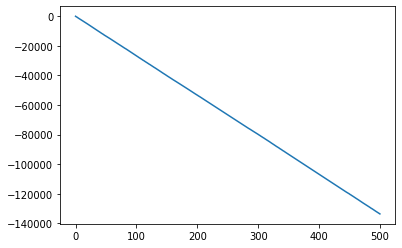

In [91]:
i = np.arange(0,num_sweeps+1,1)
plt.plot(i, total_Ms)

In [92]:
N = 30
num_sweeps = 500
S = initialise_state(N)
JkTs = np.arange(1.3, 1.58, 0.01)
BkTs = [0,0.001,0.01]
mean_M = [[],[],[]]
std_M = [[],[],[]]

for b, BkT in enumerate(BkTs):
    for JkT in JkTs:
        Ms = []
        for i in range(num_sweeps):
            S = sweep(S, JkT, BkT)
            if i >= 5:
                Ms.append(np.sum(S))
        mean_M[b].append(np.mean(Ms))
        std_M[b].append(np.std(Ms))

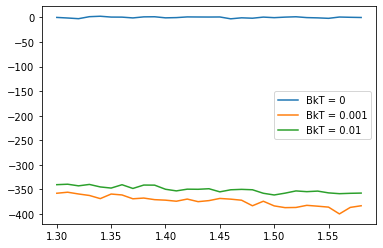

In [96]:
plt.plot(JkTs, mean_M[0], label='BkT = 0')
plt.plot(JkTs, mean_M[1], label='BkT = 0.001')
plt.plot(JkTs, mean_M[2], label='BkT = 0.01')
plt.legend()

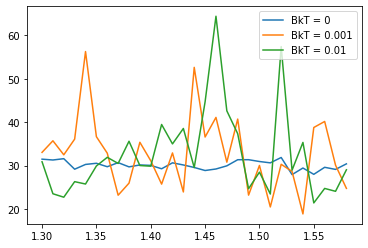

In [97]:
plt.plot(JkTs, std_M[0], label='BkT = 0')
plt.plot(JkTs, std_M[1], label='BkT = 0.001')
plt.plot(JkTs, std_M[2], label='BkT = 0.01')
plt.legend()